In [13]:
!pip install datasets
# !pip install requests

## **Import all Libraries**

In [3]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud
from nltk.util import ngrams
from datasets import load_dataset

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download necessary NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('punkt_tab')

# Download necessary NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
# Download the stopwords dataset
nltk.download('stopwords')
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Pre-Processing

In [4]:
# Directly load the dataset
dataset = load_dataset("ErfanMoosaviMonazzah/fake-news-detection-dataset-English")

# Access the training data
train_data = dataset['train']
print(train_data)


# Convert to pandas DataFrame
df = pd.DataFrame(train_data)

# Display the first few rows of the dataset
print(df.head())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/487 [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/78.4M [00:00<?, ?B/s]

validation.tsv:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/22.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8267 [00:00<?, ? examples/s]

Dataset({
    features: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'],
    num_rows: 30000
})
   Unnamed: 0                                              title  \
0        2619  Ex-CIA head says Trump remarks on Russia inter...   
1       16043  YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...   
2         876  Federal Reserve governor Powell's policy views...   
3       19963  SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...   
4       10783  NANCY PELOSI ARROGANTLY DISMISSES Questions on...   

                                                text          subject  \
0  Former CIA director John Brennan on Friday cri...     politicsNews   
1  How did this man come to OWN this store? There...  Government News   
2  President Donald Trump on Thursday tapped Fede...     politicsNews   
3  Hillary Clinton ally David Brock is offering t...        left-news   
4  Pleading ignorance is a perfect ploy for Nancy...         politics   

                date  label  
0     July 22,

In [1]:
!pip install --upgrade datasets huggingface_hub fsspec

  Using cached fsspec-2025.5.1-py3-none-any.whl.metadata (11 kB)


In [5]:
df.head()

,Unnamed: 0,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0


* 0 - Fake News
* 1 - Real News

## **Exploratory Data Analysis**

In [6]:
df.shape

(30000, 6)

In [7]:
# Check datatypes
df.dtypes

,0
Unnamed: 0,int64
title,object
text,object
subject,object
date,object
label,int64


In [ ]:
df['date'] = pd.to_datetime(df['date'],format='mixed', dayfirst=True,errors='coerce')

In [8]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Unnamed: 0    0
title         0
text          0
subject       0
date          0
label         0
dtype: int64


In [9]:
# Check Duplicate Values
df.duplicated().sum()

np.int64(0)

In [10]:
# Define the cleaning function
def data_cleaning(text):
    stop_words = set(stopwords.words("english"))
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    text = str(text)

    # Remove non-alphabet characters, URLs, and extra spaces
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('(^\s+|\s+$)', ' ', text)
    text = re.sub("@[\w\d]+", ' ', text)  # Remove @ mentions
    text = re.sub("http:[\w\:\/\.]+", ' ', text)  # Remove URLs

    # Convert to lowercase and tokenize
    text = text.lower()
    tokens = word_tokenize(text)

    # Remove stopwords and apply lemmatization
    tokens = [token for token in tokens if len(token) > 1]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into a string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply data cleaning function to the DataFrame
df["cleaned_text"] = df["text"].apply(data_cleaning)
df.head()

,Unnamed: 0,title,text,subject,date,label,cleaned_text
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1,former cia director john brennan friday critic...
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0,man come store information much fraudster exce...
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1,president donald trump thursday tapped federal...
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0,hillary clinton ally david brock offering pay ...
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0,pleading ignorance perfect ploy nancy pelosi b...


### **Univariate Analysis**

<ipython-input-11-d560969bfe31>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = years , data = df, order = years.value_counts().index , palette="viridis" )


Text(0, 0.5, 'Frequency')

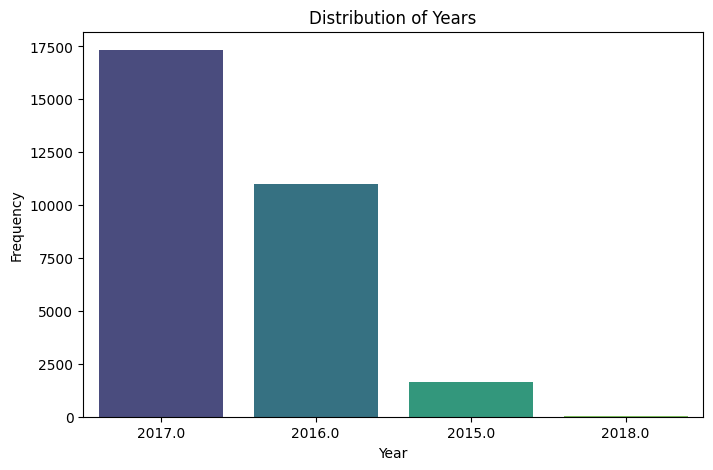

In [11]:
df['date'] = pd.to_datetime(df['date'],format='mixed', dayfirst=True,errors='coerce')

years = df['date'].dt.year

plt.figure(figsize=(8, 5))
sns.countplot(x = years , data = df, order = years.value_counts().index , palette="viridis" )
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')

**Observation**: The year 2017 witnessed the highest number of Twitter articles in our dataset. This surge aligns with the onset of Donald Trump's presidency, as he was inaugurated in January 2017. Trump's prolific use of Twitter during his first year in office significantly influenced the platform's activity. He utilized Twitter to announce policies, criticize opponents, and communicate directly with the public, which not only dominated news cycles but also led to increased engagement on the platform. This heightened activity likely contributed to the peak in Twitter articles observed in 2017.

<ipython-input-12-94dd412281a9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = month , data = df, order = month.value_counts().index , palette="viridis" )


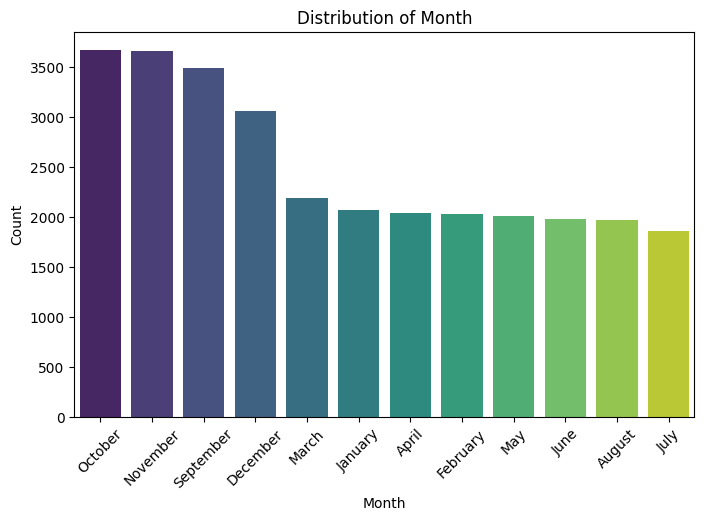

In [12]:
month = df['date'].dt.month_name()

plt.figure(figsize=(8, 5))
sns.countplot(x = month , data = df, order = month.value_counts().index , palette="viridis" )
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check class distribution
sub_check = df['label'].value_counts().reset_index()
sub_check.columns = ['label', 'Counts']  # Rename columns for clarity

# Create the bar chart
fig = px.bar(
    sub_check,
    x='label',
    y='Counts',
    color = 'Counts',
    width=800,     # Width of the figure in pixels
    height=500,
    title='Class Distribution'
)

# Show the plot
fig.show()

**Observation**: The bar chart indicates that the dataset comprises 15,478 entries labeled as "Fake News" and 14,522 entries labeled as "Real News." This near-balanced distribution ensures that both classes are well-represented, which is beneficial for training machine learning models. A balanced dataset helps in preventing bias towards one class and contributes to more reliable and accurate classification outcomes.

In [ ]:
import plotly.express as px
# Most trending Subject
sub_check = df['subject'].value_counts().reset_index()
sub_check.columns = ['subject', 'Counts']  # Rename columns for clarity

# Create the bar chart
fig = px.bar(
    sub_check,
    x='subject',
    y='Counts',
    color = 'Counts',
    width=800,     # Width of the figure in pixels
    height=500,
    title='Count of News Articles by Subject'
)

# Show the plot
fig.show()

**Observations** Political News and World News hold the most domination counts in the data set that we have considered.

## **Bivariate Analysis**

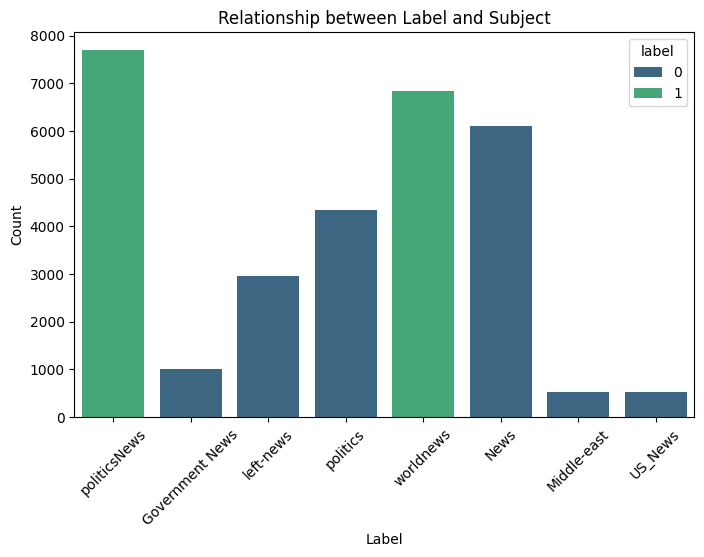

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="subject", hue="label", palette="viridis")
plt.title("Relationship between Label and Subject")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

Text(0.5, 0, 'Year')

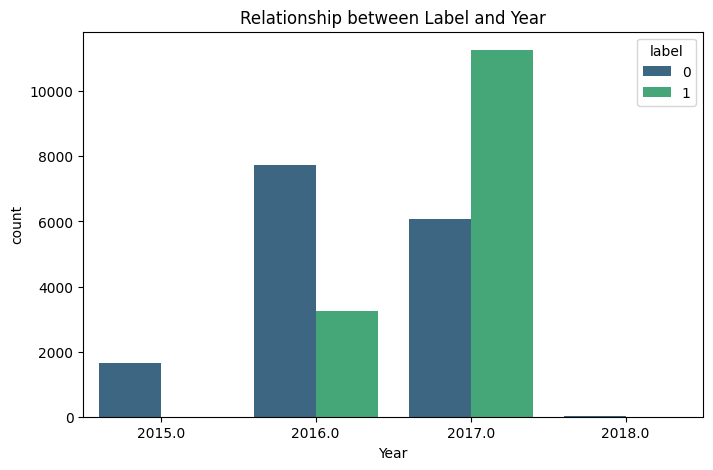

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=years , hue="label", palette="viridis")
plt.title("Relationship between Label and Year")
plt.xlabel("Year")

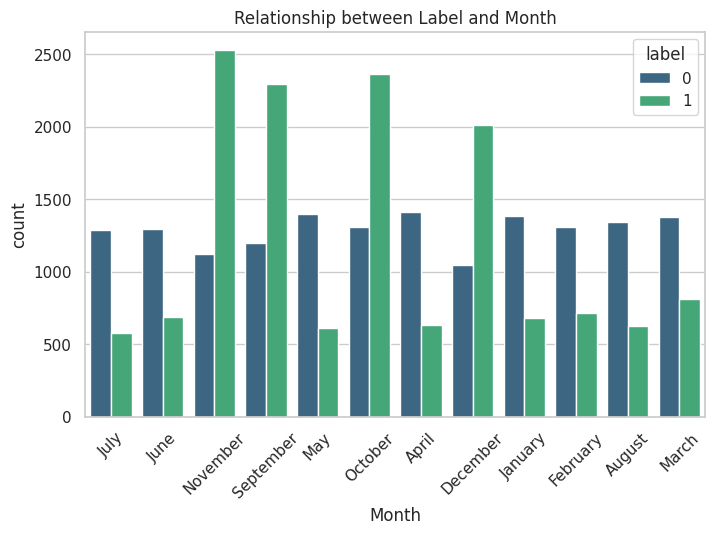

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x=month , hue="label", palette="viridis")
plt.title("Relationship between Label and Month")
plt.xlabel("Month")
plt.xticks(rotation = 45)
plt.show()

## **Biagram Analysis**

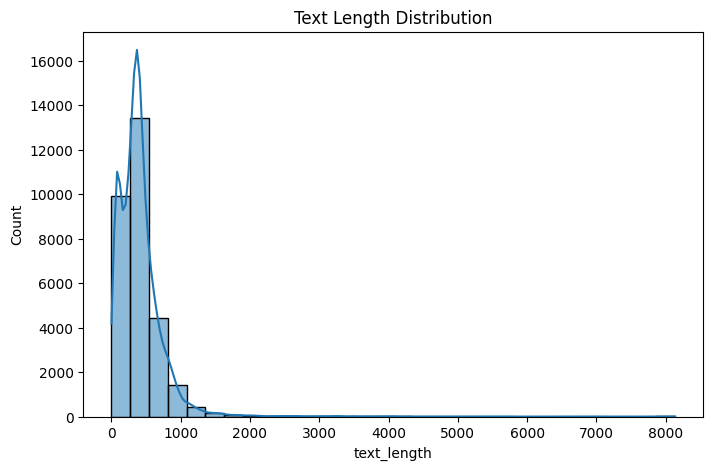

In [ ]:
# Check text length distribution
df['text_length'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.show()

Observation: Most tweets in the dataset are short, with the majority containing fewer than 1,000 characters.

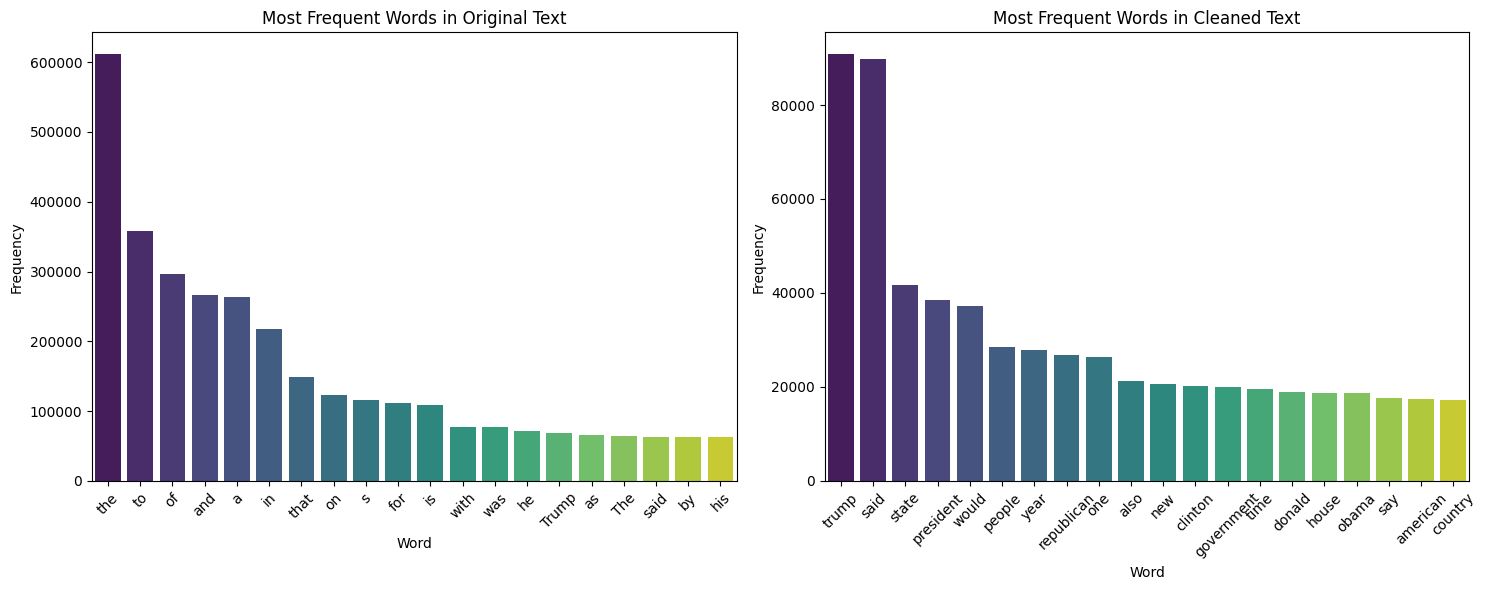

In [ ]:
# Tokenize all text in the 'text' column
all_words_text = " ".join(df["text"]).split()

# Tokenize all text in the 'cleaned_text' column
all_words_cleaned = " ".join(df["cleaned_text"]).split()

# Count word frequency for both columns
word_freq_text = Counter(all_words_text)
word_freq_cleaned = Counter(all_words_cleaned)

# Get the most common 20 words for both
common_words_text = word_freq_text.most_common(20)
common_words_cleaned = word_freq_cleaned.most_common(20)

# Convert both to DataFrames
common_df_text = pd.DataFrame(common_words_text, columns=["Word", "Frequency"])
common_df_cleaned = pd.DataFrame(common_words_cleaned, columns=["Word", "Frequency"])

# Create side-by-side subplots
plt.figure(figsize=(15, 6))

# Plot most common words for 'text' column in the first subplot
plt.subplot(1, 2, 1)  # (rows, cols, position)
sns.barplot(x="Word", y="Frequency", data=common_df_text, palette="viridis", hue="Word", legend=False)
plt.xticks(rotation=45)
plt.title("Most Frequent Words in Original Text")

# Plot most common words for 'cleaned_text' column in the second subplot
plt.subplot(1, 2, 2)  # (rows, cols, position)
sns.barplot(x="Word", y="Frequency", data=common_df_cleaned, palette="viridis", hue="Word", legend=False)
plt.xticks(rotation=45)
plt.title("Most Frequent Words in Cleaned Text")

# Display both plots side by side
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

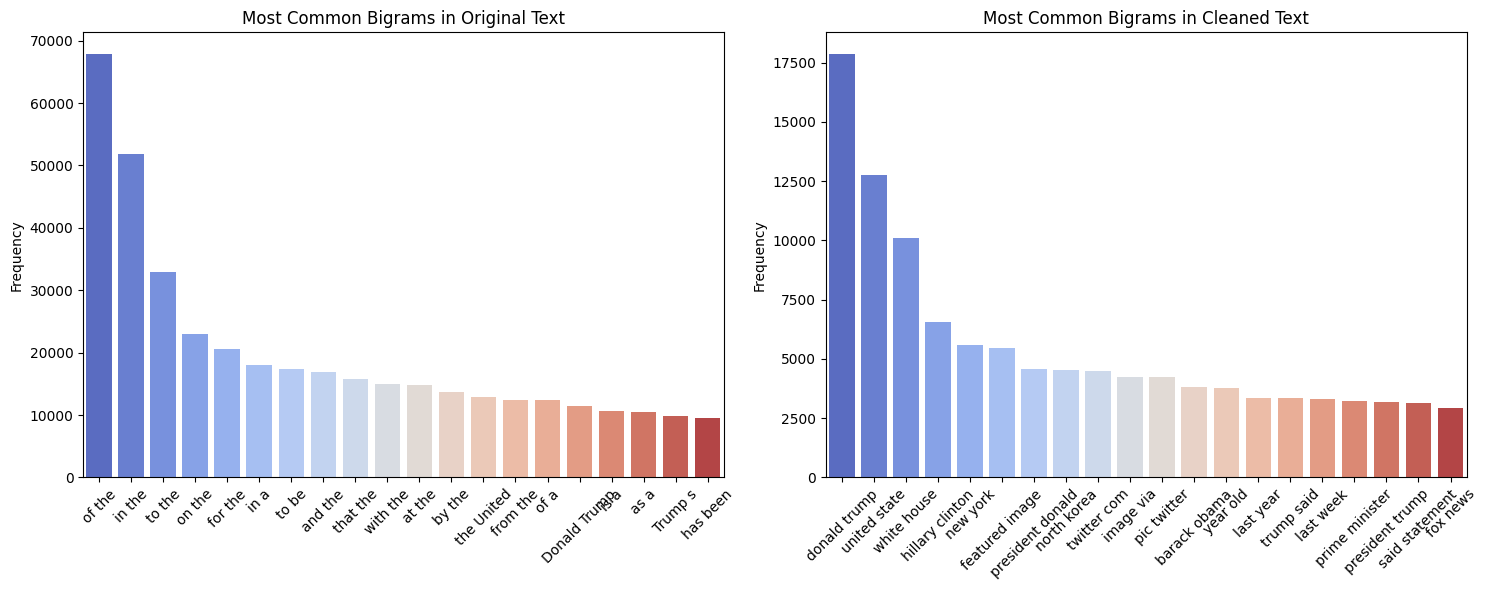

In [ ]:
# Function to extract top n-grams
def get_top_ngrams(text_series, n, top_n=20):
    all_words = " ".join(text_series).split()
    ngrams_list = list(ngrams(all_words, n))
    ngram_freq = Counter(ngrams_list)
    return ngram_freq.most_common(top_n)

# Get top bigrams for 'text' column
bigrams_text = get_top_ngrams(df["text"], 2)

# Get top bigrams for 'cleaned_text' column
bigrams_cleaned = get_top_ngrams(df["cleaned_text"], 2)

# Convert both to DataFrames
bigram_df_text = pd.DataFrame(bigrams_text, columns=["Bigram", "Frequency"])
bigram_df_cleaned = pd.DataFrame(bigrams_cleaned, columns=["Bigram", "Frequency"])

# Create side-by-side subplots
plt.figure(figsize=(15, 6))

# Plot bigrams for 'text' column in the first subplot
plt.subplot(1, 2, 1)  # (rows, cols, position)
sns.barplot(x=[" ".join(b) for b in bigram_df_text["Bigram"]], y=bigram_df_text["Frequency"], palette="coolwarm", hue=[" ".join(b) for b in bigram_df_text["Bigram"]], legend=False)
plt.xticks(rotation=45)
plt.title("Most Common Bigrams in Original Text")

# Plot bigrams for 'cleaned_text' column in the second subplot
plt.subplot(1, 2, 2)  # (rows, cols, position)
sns.barplot(x=[" ".join(b) for b in bigram_df_cleaned["Bigram"]], y=bigram_df_cleaned["Frequency"], palette="coolwarm", hue=[" ".join(b) for b in bigram_df_cleaned["Bigram"]], legend=False)
plt.xticks(rotation=45)
plt.title("Most Common Bigrams in Cleaned Text")

# Display both plots side by side
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

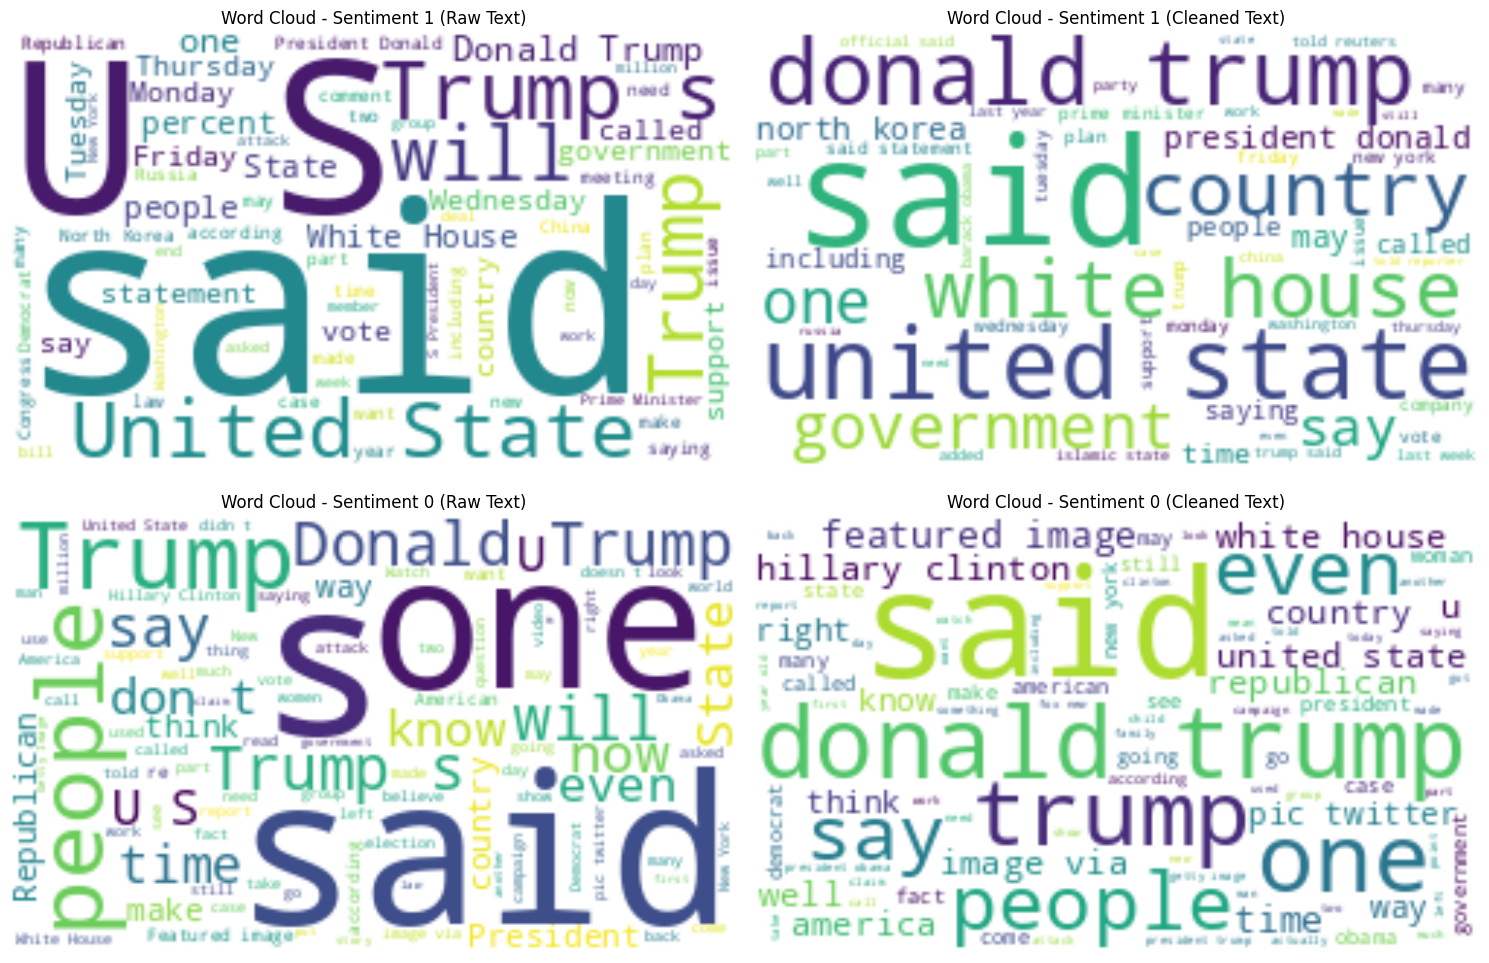

In [ ]:
# Generating most frequently occuring words

# Get unique labels
unique_labels = df["label"].unique()
n_labels = len(unique_labels)

# Create figure with appropriate size (2 columns, n_labels rows)
plt.figure(figsize=(15, 5*n_labels))

for i, label in enumerate(unique_labels):
    # First subplot: Word cloud for 'text' column
    plt.subplot(n_labels, 2, i*2+1)
    words_text = " ".join(df[df["label"] == label]["text"])
    wordcloud_text = WordCloud(width=250, height=150, background_color="white").generate(words_text)
    plt.imshow(wordcloud_text, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - Sentiment {label} (Raw Text)")

    # Second subplot: Word cloud for 'cleaned_text' column
    plt.subplot(n_labels, 2, i*2+2)
    words_cleaned = " ".join(df[df["label"] == label]["cleaned_text"])
    wordcloud_cleaned = WordCloud(width=250, height=150, background_color="white").generate(words_cleaned)
    plt.imshow(wordcloud_cleaned, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud - Sentiment {label} (Cleaned Text)")

plt.tight_layout()
plt.show()

**Observation:** Cleaning the textual data has significantly enhanced the clarity and specificity of the most frequent words.

Fake News (Label 0): The cleaned data reveals a dominance of general terms such as "said," "people," and "Donald Trump." These words often reflect speculative or generalized language, which is characteristic of fake news content.

Real News (Label 1): In contrast, the cleaned data for real news highlights more specific and informative terms like "United States," "White House," and "Donald Trump." The presence of these precise entities indicates a focus on factual reporting and detailed information

## **Sentimental Analysis**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import plotly.express as px
import pandas as pd

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to compute sentiment scores
def get_sentiment_scores(text):
    return sia.polarity_scores(str(text))['compound']

# Apply sentiment analysis to the 'cleaned_text' column
df['cleaned_text_sentiment'] = df['cleaned_text'].apply(get_sentiment_scores)

# Categorize sentiment scores into positive, negative, or neutral
df['sentiment'] = pd.cut(df['cleaned_text_sentiment'],
                        bins=[-1, -0.05, 0.05, 1],
                        labels=['negative', 'neutral', 'positive'])

# Calculate sentiment counts and percentages
sentiment_counts = df['sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['sentiment', 'count']
sentiment_counts['percentage'] = (sentiment_counts['count'] / sentiment_counts['count'].sum()) * 100


# Create labels combining count and percentage
sentiment_counts['label'] = sentiment_counts.apply(
    lambda row: f"{row['count']} ({row['percentage']:.2f}%)", axis=1
)

# Create the bar chart with combined labels
fig = px.pie(
    sentiment_counts,
    names='sentiment',
    values='count',
    title='Sentiment Distribution',
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Customize the text to show both percentage and count
fig.update_traces(
    textinfo='percent+value',
    textfont_size=14,

)

# Update layout for width and height
fig.update_layout(
    width=800,     # Width of the figure in pixels
    height=500
)

# Display the figure
fig.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


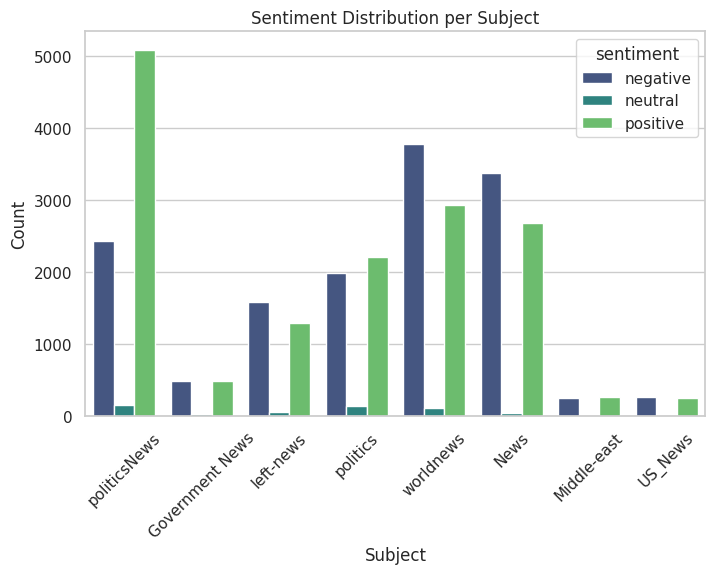

In [ ]:
# prompt: write a code to sentiment distribution per subject use sns plot

# Assuming 'df' and 'sns' are already defined from the previous code.

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="subject", hue="sentiment", palette="viridis")
plt.title("Sentiment Distribution per Subject")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


most of the poltical news have highest positive sentiments and world news has above 3000 negative sentiments which is highest among all subjects

## **Converting Text into Number**

In [13]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df["cleaned_text"])

# Convert to DataFrame
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display TF-IDF features
print(X_tfidf_df.head())


   abadi  abandon  abandoned  abbas  abc  abdullah  abe  abedin  ability  \
0    0.0      0.0        0.0    0.0  0.0       0.0  0.0     0.0      0.0   
1    0.0      0.0        0.0    0.0  0.0       0.0  0.0     0.0      0.0   
2    0.0      0.0        0.0    0.0  0.0       0.0  0.0     0.0      0.0   
3    0.0      0.0        0.0    0.0  0.0       0.0  0.0     0.0      0.0   
4    0.0      0.0        0.0    0.0  0.0       0.0  0.0     0.0      0.0   

   able  ...  youtube  ypg  zealand  zero  zika  zimbabwe  zinke  zone  zor  \
0   0.0  ...      0.0  0.0      0.0   0.0   0.0       0.0    0.0   0.0  0.0   
1   0.0  ...      0.0  0.0      0.0   0.0   0.0       0.0    0.0   0.0  0.0   
2   0.0  ...      0.0  0.0      0.0   0.0   0.0       0.0    0.0   0.0  0.0   
3   0.0  ...      0.0  0.0      0.0   0.0   0.0       0.0    0.0   0.0  0.0   
4   0.0  ...      0.0  0.0      0.0   0.0   0.0       0.0    0.0   0.0  0.0   

   zuma  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  

[5 rows

## **Split Data**

In [14]:

# Define X (features) and y (labels)
X = X_tfidf
y = df["label"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (24000, 5000)
Testing Data Shape: (6000, 5000)




*   x : Feature generated for Tf-dif
*   y : Target variable
*   test_size=0.2 : 20% of the data reserve for validation



## **Model Training**

In [15]:
# Train Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)


## **Classification Report**

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Define a function for evaluation
def evaluate_model(model_name, y_test, y_pred):
    print(f"\n🔹 Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Evaluate models
evaluate_model("Naive Bayes", y_test, nb_preds)
evaluate_model("Logistic Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)


🔹 Model: Naive Bayes
Accuracy: 0.9245
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      3137
           1       0.92      0.92      0.92      2863

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000

Confusion Matrix:
 [[2924  213]
 [ 240 2623]]

🔹 Model: Logistic Regression
Accuracy: 0.9745
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      3137
           1       0.97      0.98      0.97      2863

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000

Confusion Matrix:
 [[3040   97]
 [  56 2807]]

🔹 Model: Random Forest
Accuracy: 0.9813333333333333
Classification Report:
               precision    recall  f1-score

The three models—Naive Bayes, Logistic Regression, and Random Forest—were evaluated for classifying real and fake news.
* Naive Bayes achieved a solid accuracy of 92.45%, with balanced precision and recall around 92%, indicating reliable but basic performance.
* Logistic Regression improved on this with 97.45% accuracy and strong metrics near 98%, showing better distinction between classes.
* Random Forest performed best, reaching 98.13% accuracy and consistently high precision, recall, and F1-scores, demonstrating superior reliability and minimal misclassification.

Overall, all models effectively handle the classification task, with Random Forest providing the most robust results, making it the best choice for accurate fake news detection and prediction on new data.



## **Prediction**

In [17]:
def predict_sentiment(text, models, vectorizer):
    """
    Predicts whether the news is real or fake using multiple models.

    Parameters:
    - text (str): The input news text.
    - models (dict): Dictionary of model instances.
    - vectorizer (object): TF-IDF vectorizer used for text preprocessing.

    Returns:
    - dict: Dictionary with model names as keys and prediction strings ("Real"/"Fake") as values.
    """
    # Clean the text
    cleaned_text = data_cleaning(text)
    print("Cleaned Text:", cleaned_text)

    # Vectorize the text
    text_vectorized = vectorizer.transform([cleaned_text])

    # Prediction mapping
    label_map = {0: "Fake", 1: "Real"}

    # Predict with each model
    predictions = {}
    for model_name, model in models.items():
        pred = model.predict(text_vectorized)[0]
        predictions[model_name] = f"This news is {label_map[pred]}."

    return predictions


# Example usage
sample_text = "Multiple blasts in Peshawar, entire city turned to dust."

models_dict = {
    "Logistic Regression": lr_model,
    "Naive Bayes": nb_model,
    "Random Forest": rf_model
}

results = predict_sentiment(sample_text, models_dict, tfidf_vectorizer)

# Display results
for model_name, output in results.items():
    print(f"{model_name}: {output}")


Cleaned Text: multiple blast peshawar entire city turned dust
Logistic Regression: This news is Fake.
Naive Bayes: This news is Fake.
Random Forest: This news is Fake.


# **Saving Models**

In [20]:
import joblib
import os

# Define the directory path
models_dir = 'models'

# Create the directory if it doesn't exist
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Save each model
joblib.dump(lr_model, os.path.join(models_dir, 'lr_model.pkl'))
joblib.dump(rf_model, os.path.join(models_dir, 'rf_model.pkl'))
joblib.dump(nb_model, os.path.join(models_dir, 'nb_model.pkl'))

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, os.path.join(models_dir, 'tfidf_vectorizer.pkl'))

print(f"All models and vectorizer saved successfully to '{models_dir}'.")

All models and vectorizer saved successfully to 'models'.
